In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [35]:
# Print Measurement table to understand data you are working with.
import pandas as pd
df_measurement = pd.read_sql('select * from measurement', engine)
df_measurement

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
5,6,USC00519397,2010-01-07,0.06,70.0
6,7,USC00519397,2010-01-08,0.00,64.0
7,8,USC00519397,2010-01-09,0.00,68.0
8,9,USC00519397,2010-01-10,0.00,73.0
9,10,USC00519397,2010-01-11,0.01,64.0


In [11]:
# Print Station table to understand data you are working with.
df_station = pd.read_sql('select * from station', engine)
df_station.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


# Exploratory Climate Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. (Last date recorded is 2017-08-23, so use last 12 months of data in set: August 1, 2016 to August 1, 2017)
prcp_query = session.query(measurement.date, measurement.prcp).filter(measurement.date.between('2016-08-01', '2017-08-01'))

In [13]:
# Save the query results as a Pandas DataFrame 
prcp_df = pd.DataFrame(prcp_query,columns=['date', 'prcp'])

# Set the index to the date column
prcp_df.set_index('date', inplace=True)

# Sort the dataframe by date
prcp_df = prcp_df.sort_values(by='date', ascending=True)

print(prcp_df)

            prcp
date            
2016-08-01  0.08
2016-08-01  3.53
2016-08-01   NaN
2016-08-01  2.21
2016-08-01  2.35
2016-08-01  0.54
2016-08-02  0.05
2016-08-02  1.14
2016-08-02  0.83
2016-08-02  0.00
2016-08-02  0.07
2016-08-02  0.55
2016-08-02  0.20
2016-08-03  0.02
2016-08-03  0.00
2016-08-03   NaN
2016-08-03  0.02
2016-08-03  0.00
2016-08-03  0.01
2016-08-03  0.00
2016-08-04   NaN
2016-08-04  0.62
2016-08-04  0.04
2016-08-04  0.77
2016-08-04  0.25
2016-08-04  0.13
2016-08-05   NaN
2016-08-05  0.03
2016-08-05  0.01
2016-08-05  0.27
...          ...
2017-07-27  0.00
2017-07-28  0.00
2017-07-28  0.40
2017-07-28  0.01
2017-07-28  0.00
2017-07-28  0.09
2017-07-28  0.13
2017-07-28  0.14
2017-07-29  0.30
2017-07-29  0.00
2017-07-29  0.23
2017-07-29  0.06
2017-07-29  0.00
2017-07-29  0.02
2017-07-30  0.30
2017-07-30  0.00
2017-07-30  0.00
2017-07-30  0.00
2017-07-30  0.00
2017-07-31   NaN
2017-07-31  0.00
2017-07-31   NaN
2017-07-31  0.00
2017-07-31  0.00
2017-07-31  0.00
2017-07-31  0.

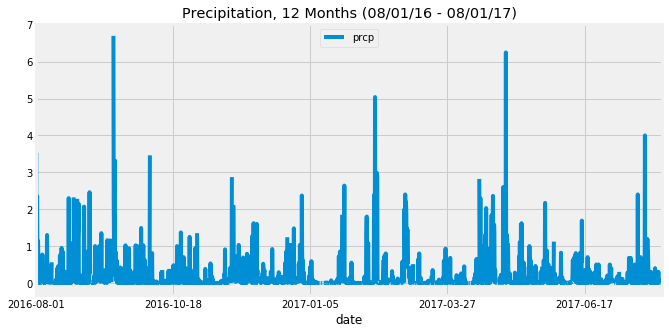

In [41]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(title="Precipitation, 12 Months (08/01/16 - 08/01/17)", figsize=(10, 5))
plt.legend(loc='upper center')
plt.savefig("precipitation.png")
plt.show()

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2070.000000
mean,0.187353
std,0.474850
min,0.000000
25%,0.000000
50%,0.020000
75%,0.140000
max,6.700000


In [16]:
# Design a query to show how many stations are available in this dataset?
unique_stations_query = session.query(measurement.station).distinct().count()
print(unique_stations_query)

9


In [ ]:
# func.count()

In [34]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order by using group by.

stations_byactivity_query = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station)).all()
# query_string = "SELECT measurement.station AS measurement_station, count(measurement.station) AS count_1 FROM measurement GROUP BY measurement.station ORDER BY count(measurement.station)"

print(stations_byactivity_query)


[('USC00518838', 511), ('USC00517948', 1372), ('USC00511918', 1979), ('USC00514830', 2202), ('USC00516128', 2612), ('USC00519523', 2669), ('USC00513117', 2709), ('USC00519397', 2724), ('USC00519281', 2772)]


In [38]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
# use this station => ('USC00519281', 2772)

# temperature 
lowest_temp_by_station = session.query(func.min(measurement.tobs)).filter(measurement.station == "USC00519281").all()


[(54.0)]

In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip = calc_temps('2017-08-01', '2017-08-15')
print(trip)

In [ ]:
# Put data into a data frame using Pandas
trip_temp_df = pd.DataFrame(trip, columns=['tmin', 'tavg', 'tmax'])
trip_temp_df

In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

